## **Data Science Problem Statement: Employee Attrition Prediction**


In [51]:
#Loading basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [52]:
#Importing preproceing from sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [53]:
#Importing model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score



1.LOADING DATA SET

In [54]:
df=pd.read_csv('/content/Employee.csv')

In [55]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [56]:
#Shape of the df
df.shape

(74498, 24)

74498 rows and 24 features

In [57]:
#Check any missing values
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

There are missing values.

In [58]:
#Printing column with missing values
obj_miss=[]
num_miss=[]
for col in df:
  if df[col].isna().sum()>0:
    if df[col].dtype=='object':
      obj_miss.append(col)
    else:
      num_miss.append(col)
print(f"categorical column with missing values:{obj_miss}")
print(f"numerical columns woith missing values:{num_miss}")



categorical column with missing values:['Work-Life Balance', 'Performance Rating', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Employee Recognition']
numerical columns woith missing values:['Number of Promotions', 'Number of Dependents']


## **Univariate Analyisis**

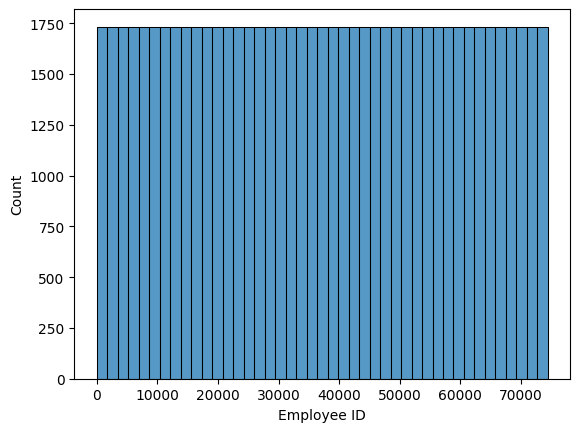

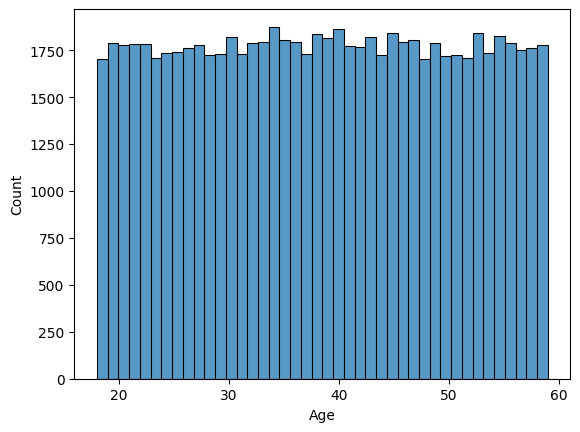

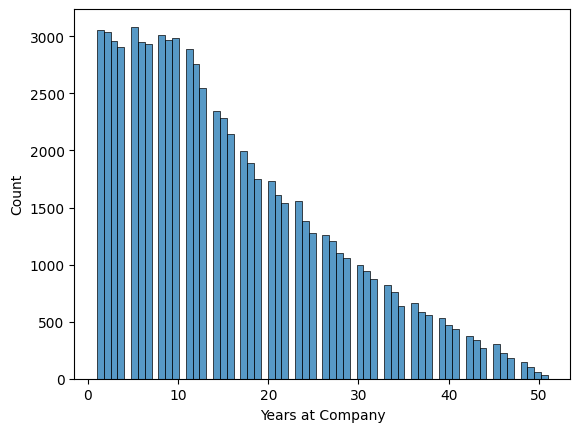

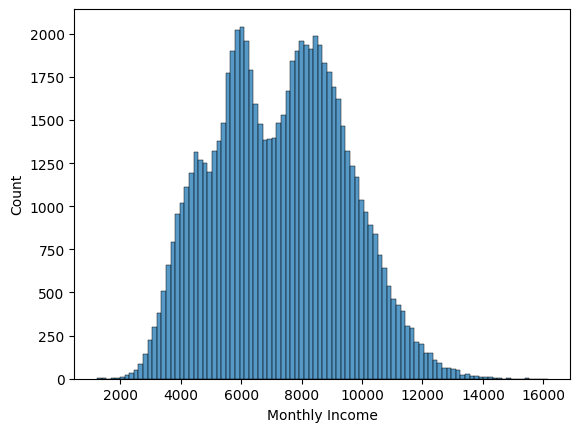

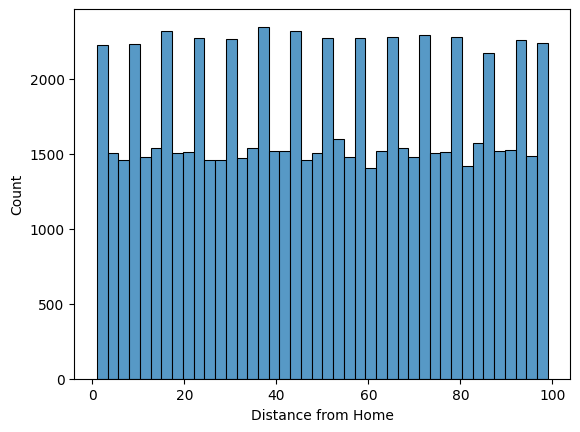

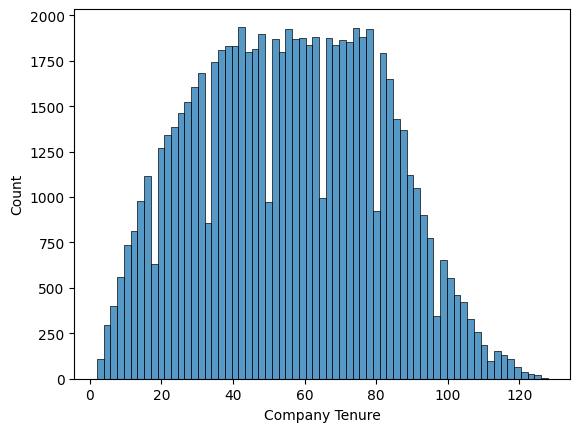

In [59]:
#For numerical columns plotting histograms
for col in df.select_dtypes(include=['int64']):
    sns.histplot(df[col])
    plt.show()

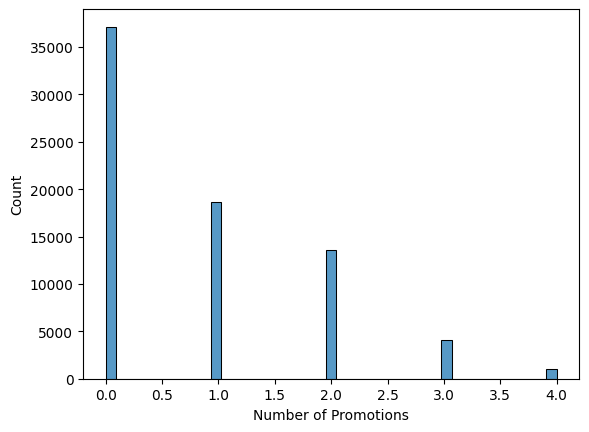

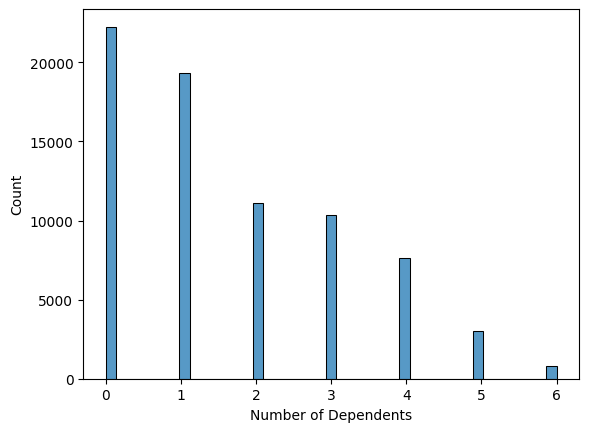

In [60]:
#For continuous numerical columns plotting histograms
for col in df.select_dtypes(include=['float64']):
    sns.histplot(df[col])
    plt.show()

The above two column are of discrete numeric type.Let's make them as int64

In [61]:
#Describing numeric data
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [62]:
#Describing categorical data
df.describe(include='object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498,74498,74494,74498,74494,74498,74493,74494,74493,74496,74495,74498,74498,74498,74496,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40826,19322,28157,37245,44716,50157,22331,37417,29778,37230,60297,70845,62394,37182,29619,39128


## **Observations from univariate Analysis and statistical describe fn**

Observations:
Column Age:18-59 Aged people working at the company

Yeras at company:The maximunm no of years worked at company is 51

Monthly income:Range 1226-16149

Distance from home:Range 1-99 km

Company Tenure:

No of promotions:The number of people get 4

promotions are very less compared to 1,2,3.

No of Dependents:
Dependents number vary from 1-6.


## **Null value handling**

In [63]:
#Handling missing vlaues in obj columns with mode
for col in obj_miss:
  df[col]=df[col]
  df[col]=df[col].fillna(df[col].mode()[0])

In [64]:
#Handling integer values with median and float values with mean
for col in num_miss:
  if df[col].dtype=='float64':
    df[col]=df[col].fillna(df[col].mean())
  else:
    df[col]=df[col].fillna(df[col].median())


In [65]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Missing values Handled.

## **Outliers Handling**

[]

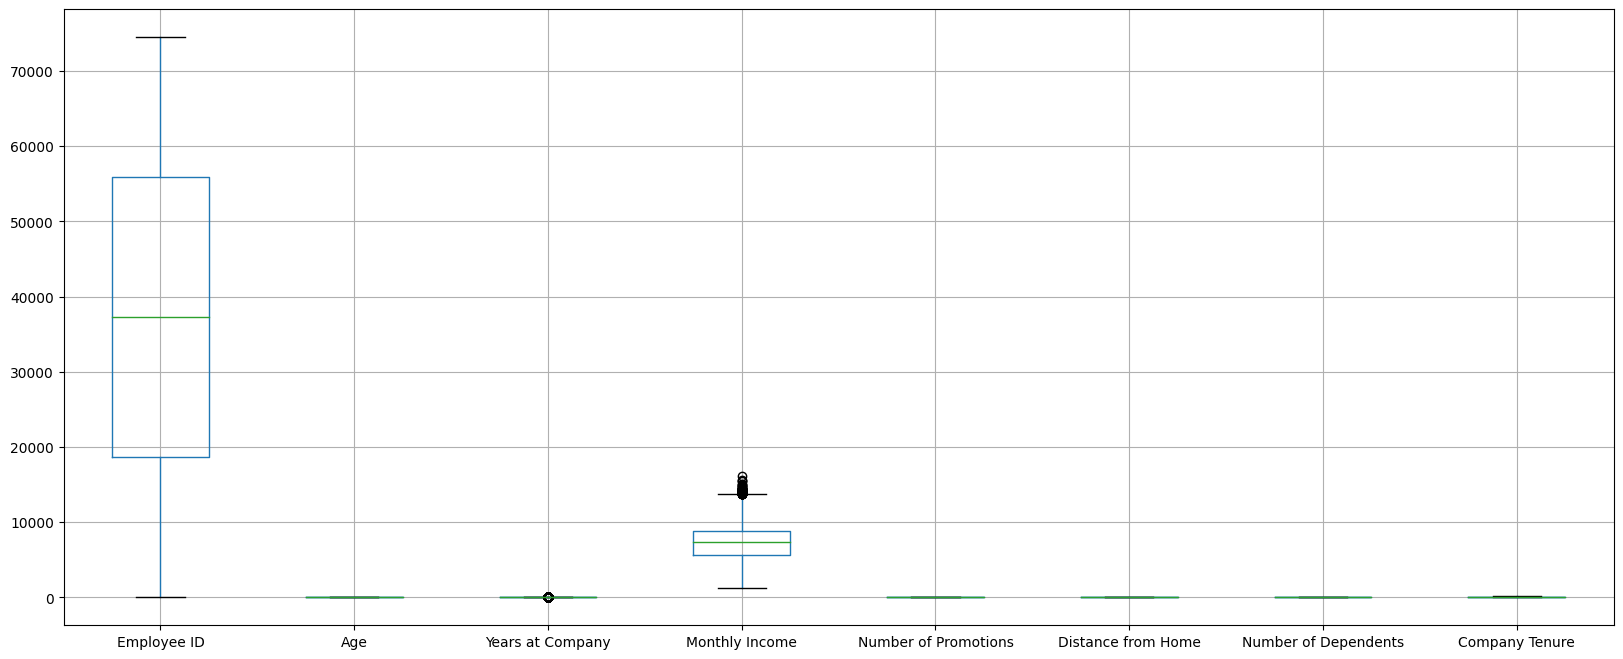

In [66]:
plt.subplots(figsize=(20,8))
df.boxplot(return_type='dict')
plt.xlabel.rotaion=45
plt.plot()

In [67]:
#column to check outliers
for col in  df.select_dtypes(include=[np.number]):
  print(df[col])
  Q1=np.percentile(df[col],25,method='midpoint')
  Q2=np.percentile(df[col],50,method='midpoint')
  Q3=np.percentile(df[col],75,method='midpoint')
  print(f"Q1:{Q1},Q2:{Q2},Q3:{Q3}")
  IQR=Q3-Q1
  print(f"IQR:{IQR}")
  low_lim=Q1-1.5*IQR
  up_lim=Q3+1.5*IQR
  print('lower whisker',low_lim,'upper whisker',up_lim)
  outlier=[]
  for x in df[col]:
    if((x<low_lim)or (x>up_lim)):
      outlier.append(x)
  print(f"outlier for column {col} is {outlier}")


0         8410
1        64756
2        30257
3        65791
4        65026
         ...  
74493    16243
74494    47175
74495    12409
74496     9554
74497    73042
Name: Employee ID, Length: 74498, dtype: int64
Q1:18625.5,Q2:37249.5,Q3:55873.5
IQR:37248.0
lower whisker -37246.5 upper whisker 111745.5
outlier for column Employee ID is []
0        31
1        59
2        24
3        36
4        56
         ..
74493    56
74494    30
74495    52
74496    18
74497    59
Name: Age, Length: 74498, dtype: int64
Q1:28.0,Q2:39.0,Q3:49.0
IQR:21.0
lower whisker -3.5 upper whisker 80.5
outlier for column Age is []
0        19
1         4
2        10
3         7
4        41
         ..
74493    42
74494    15
74495     5
74496     4
74497    48
Name: Years at Company, Length: 74498, dtype: int64
Q1:7.0,Q2:13.0,Q3:23.0
IQR:16.0
lower whisker -17.0 upper whisker 47.0
outlier for column Years at Company is [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50

Outliers are observed at Years at Company,Monthly Income
I think we can leave it as it is.

# **Bivariate Analysis**

In [68]:
#Removing column Employee Id as it doesn't relate to attrition
df=df.drop('Employee ID',axis=1)

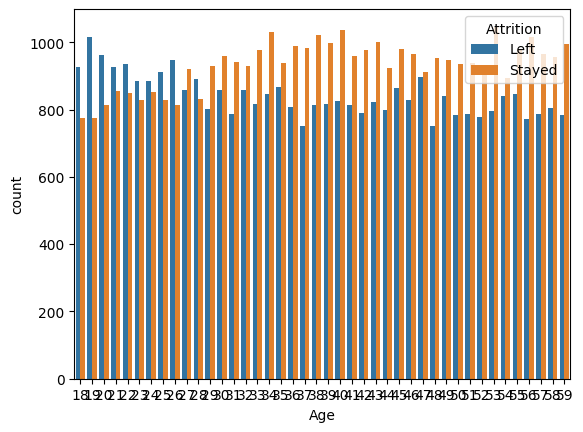

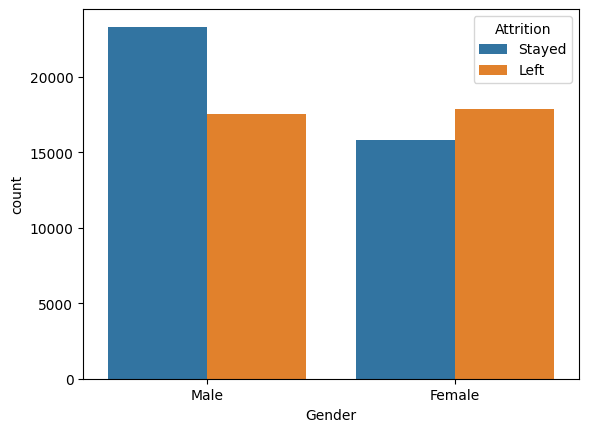

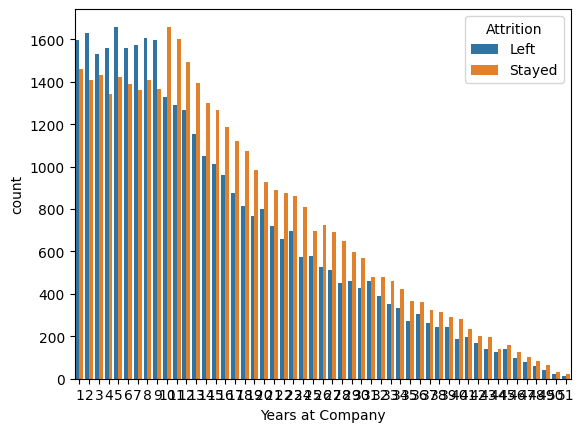

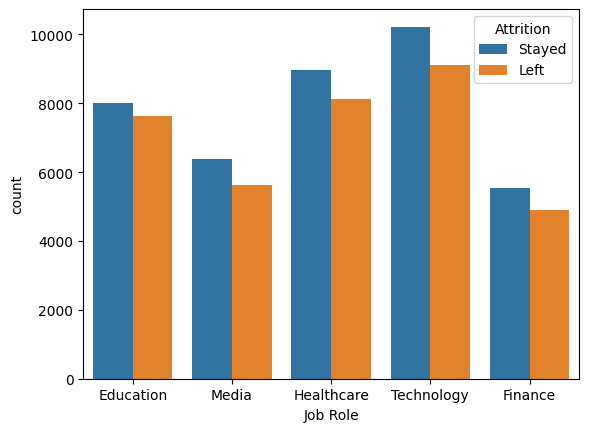

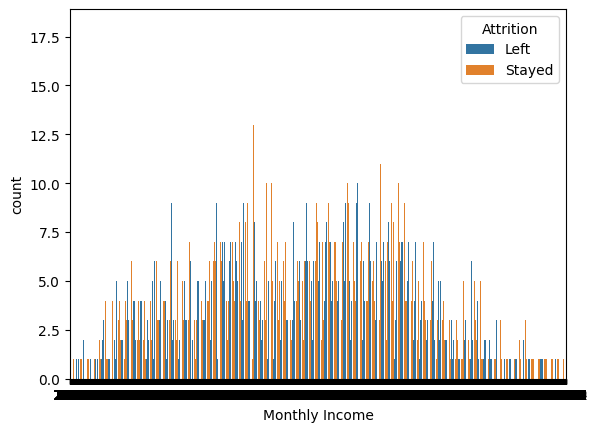

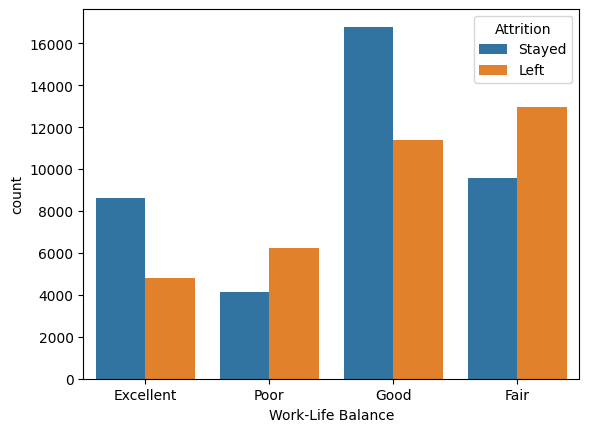

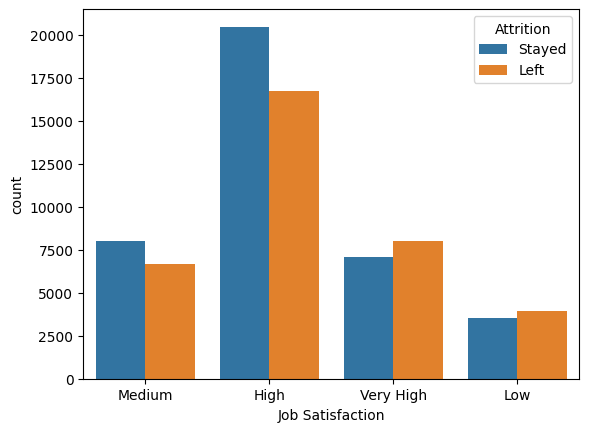

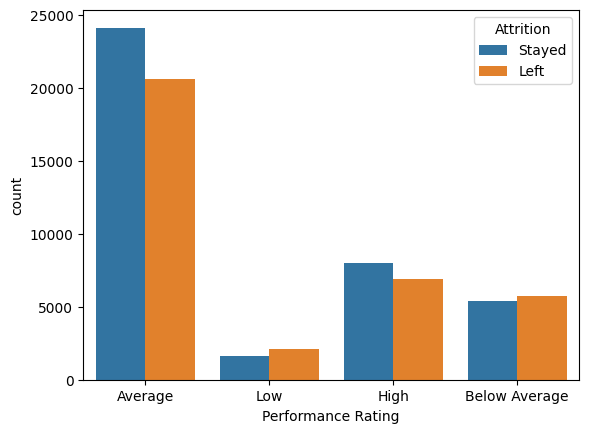

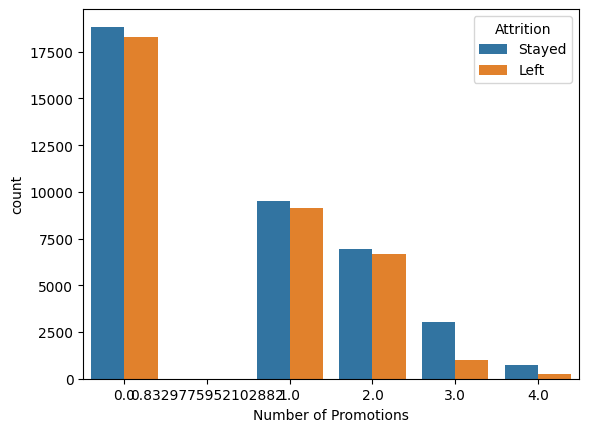

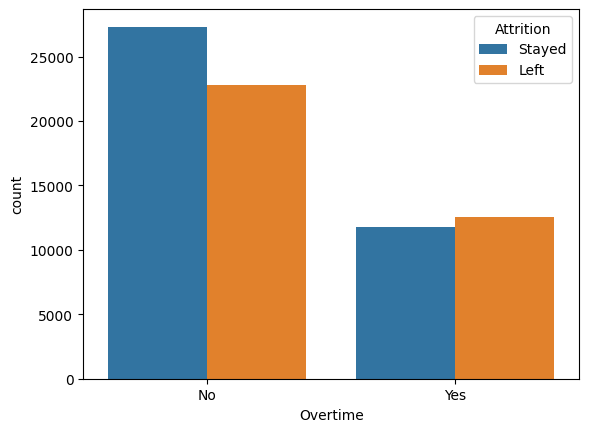

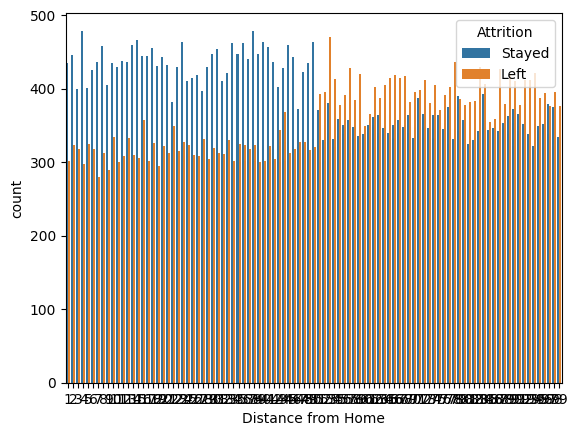

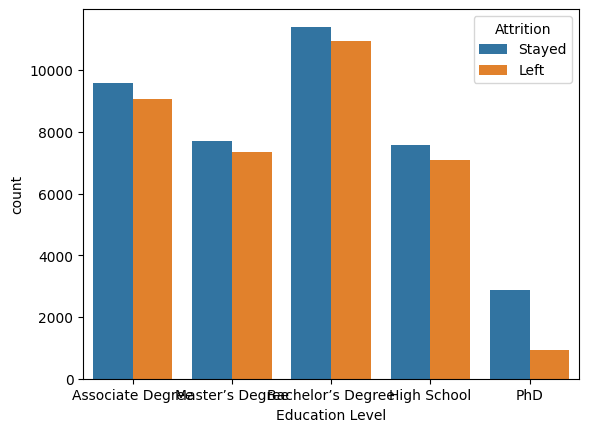

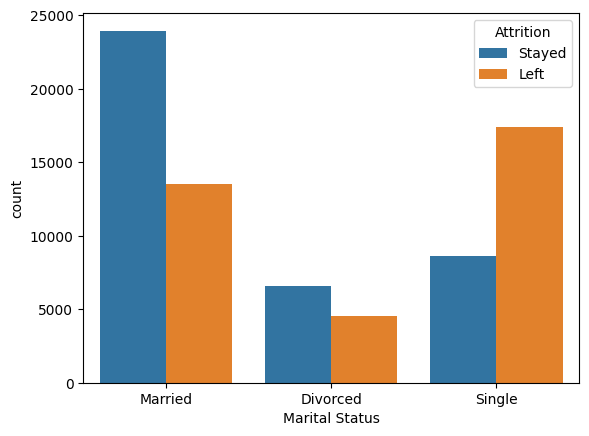

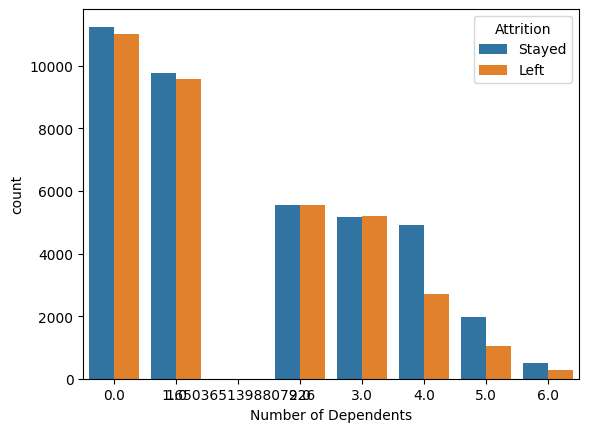

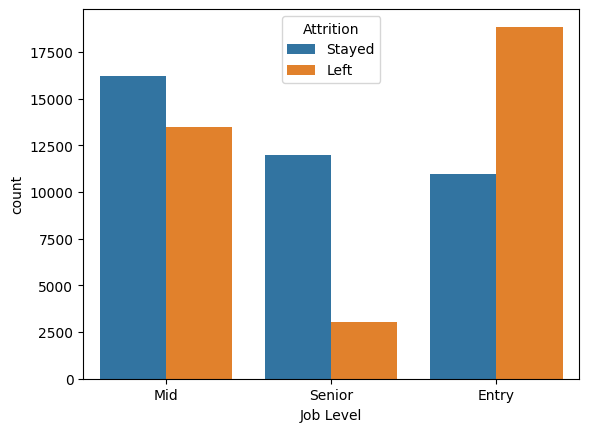

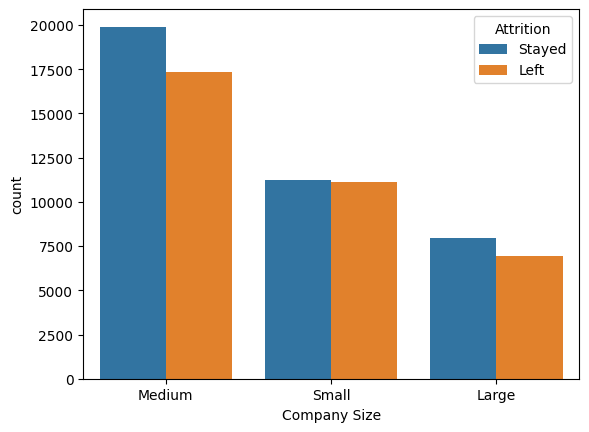

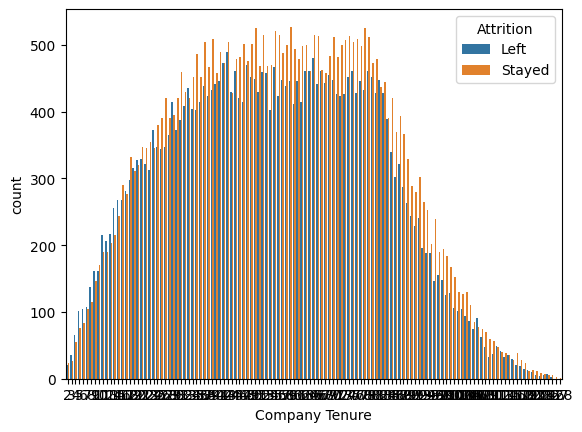

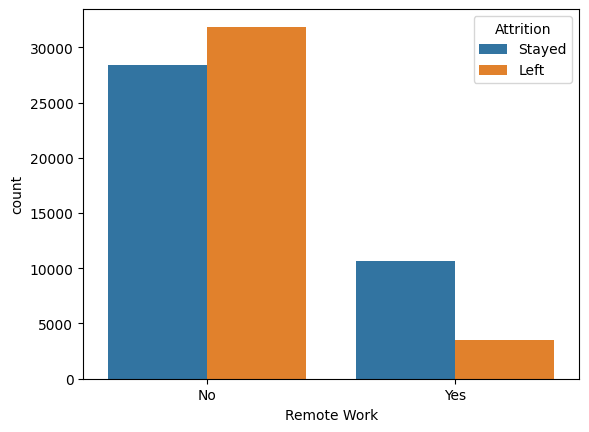

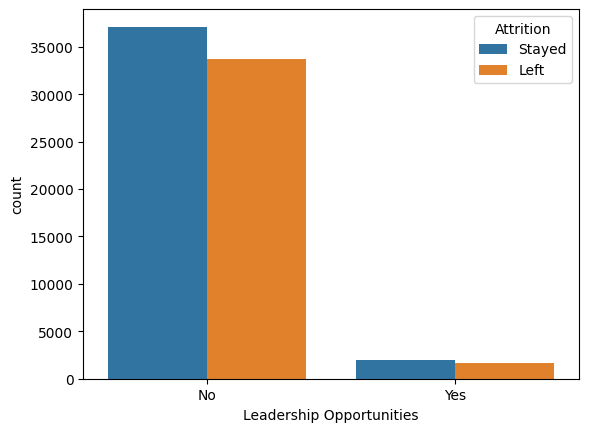

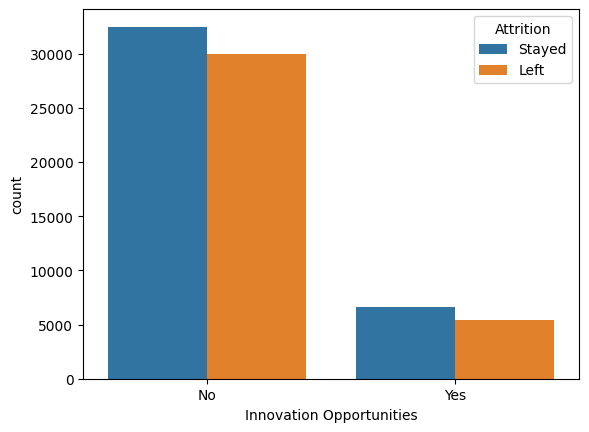

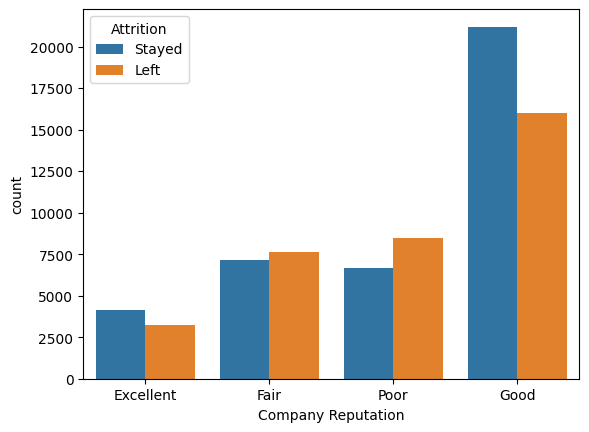

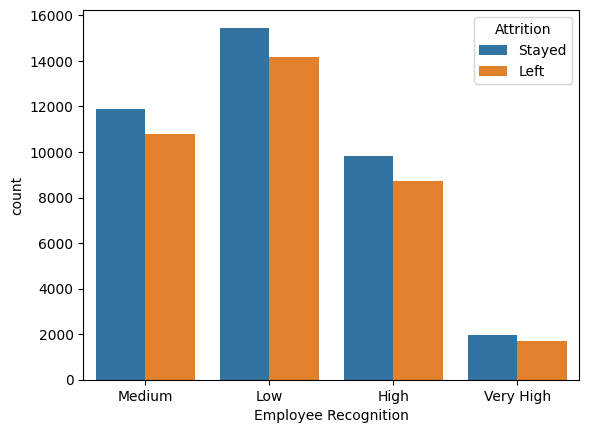

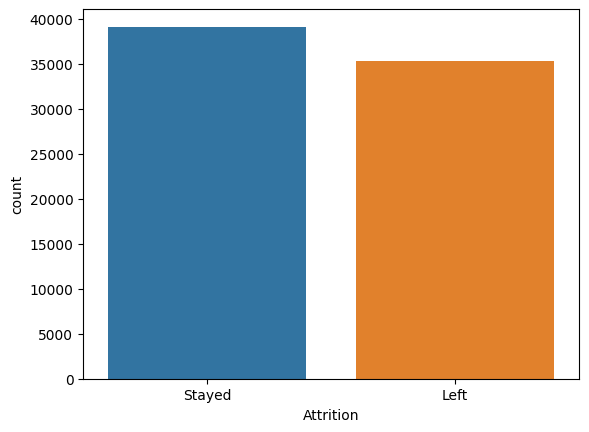

In [69]:
for col in df:
  sns.countplot(x=col, hue='Attrition', data=df)
  plt.show()

Observation:
Attrition rate of employees with less years at company is more.
Technology department have more attrition rate
Male gender has got more attritions.

Monthly Income:fair level income people got
 more left

Job staifaction:High job satisfaction stayed more also
left more

Average performance rated people left the company more
People got no promotion left the company more


In [70]:
#sns.pairplot(df)

In [71]:
#Finding correlation matrix for df
df.corr(numeric_only=True)


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Age,1.000000,0.537318,-0.001750,0.000655,-0.004586,0.003650,0.236337
Years at Company,0.537318,1.000000,-0.005971,0.000942,-0.004835,0.004393,0.442580
Monthly Income,-0.001750,-0.005971,1.000000,0.005690,-0.001910,0.001465,-0.006911
Number of Promotions,0.000655,0.000942,0.005690,1.000000,-0.006869,-0.001452,0.005149
Distance from Home,-0.004586,-0.004835,-0.001910,-0.006869,1.000000,-0.000985,-0.005735
Number of Dependents,0.003650,0.004393,0.001465,-0.001452,-0.000985,1.000000,0.000433
Company Tenure,0.236337,0.442580,-0.006911,0.005149,-0.005735,0.000433,1.000000


<Axes: >

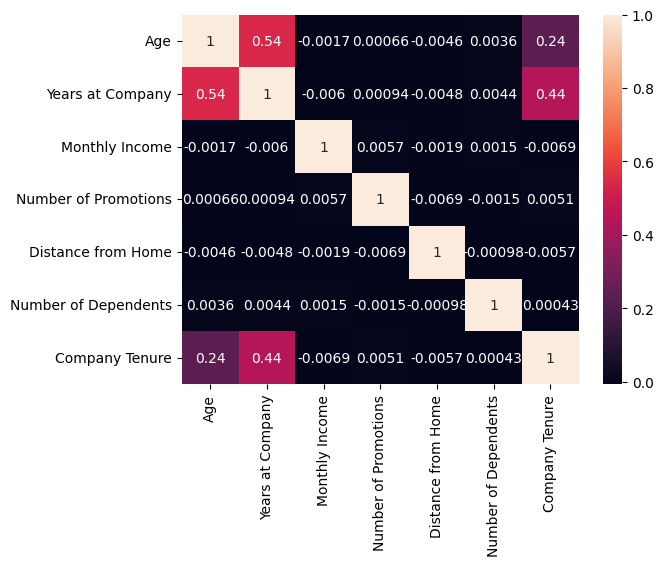

In [72]:
#Plotting heat map
plt.figure.figsize=(20,10)
sns.heatmap(df.corr(numeric_only=True),annot=True)

## **Skewness treatment**

In [73]:
df.skew(numeric_only=True)

Age                    -0.001608
Years at Company        0.789908
Monthly Income          0.118312
Number of Promotions    0.992755
Distance from Home      0.001765
Number of Dependents    0.707120
Company Tenure          0.065670
dtype: float64

<Axes: xlabel='Years at Company', ylabel='Density'>

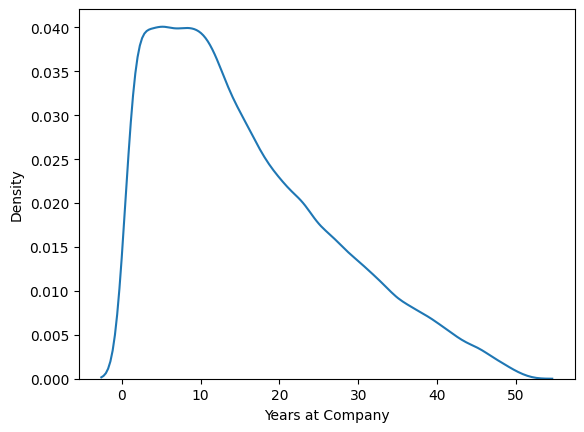

In [74]:
sns.kdeplot(df['Years at Company'])

In [75]:
#Taking lag transformation of data years at company
df['Years at Company'] = np.log(df['Years at Company'])


<Axes: xlabel='Years at Company', ylabel='Count'>

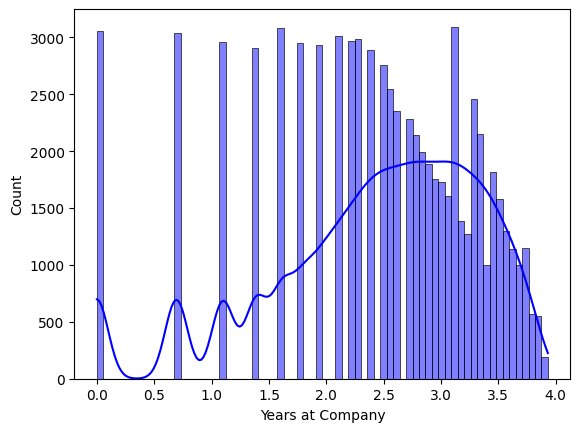

In [76]:
#After normalising

sns.histplot(data=df, x="Years at Company", kde=True, color='blue')


Selcting Data

## **Selecting Target and Features**

In [77]:
le=LabelEncoder()
for col in df.select_dtypes(include='object'):
  df[col]=le.fit_transform(df[col])

## **Label Encoding the columns**

In [78]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']



## **Scaling**

In [88]:
X_train_scaled=StandardScaler().fit_transform(x)
X_test_scaled=StandardScaler().fit_transform(x)

Splitting data

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.30, random_state=1001
  )

In [81]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
import sklearn
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
models={'LR_MODEL':LR(),'DTC_MODEL':DTC(),'RFC_MODEL':RFC(),'xgb_MODEL': xgb()}


In [83]:
model_comparison=[]

In [84]:
for name,model in models.items():
  print(model)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_comparison.append({'Name': model, 'Accuracy_score': accuracy_score(y_test, y_pred)})
  print(f'Accuracy_score:\n{accuracy_score(y_test, y_pred)}')
  print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
  print(f'Classification report:\n{classification_report(y_test,y_pred)}')

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy_score:
0.6998657718120805
Confusion matrix:
[[7189 3470]
 [3238 8453]]
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     10659
           1       0.71      0.72      0.72     11691

    accuracy                           0.70     22350
   macro avg       0.70      0.70      0.70     22350
weighted avg       0.70      0.70      0.70     22350

DecisionTreeClassifier()
Accuracy_score:
0.6668456375838926
Confusion matrix:
[[6936 3723]
 [3723 7968]]
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10659
           1       0.68      0.68      0.68     11691

    accuracy                           0.67     22350
   macro avg       0.67      0.67      0.67     22350
weighted avg       0.67      0.67      0.67     22350

RandomForestClassifier()
Accuracy_score:
0.7432662192393736
Confusion matrix:
[[7755 2904]
 [2834 8857]]
Classifica

In [85]:
for i in model_comparison:
  print(i)


{'Name': LogisticRegression(), 'Accuracy_score': 0.6998657718120805}
{'Name': DecisionTreeClassifier(), 'Accuracy_score': 0.6668456375838926}
{'Name': RandomForestClassifier(), 'Accuracy_score': 0.7432662192393736}
{'Name': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'Accuracy_score':

The model XGBoost classifier gives the maximum accuracy score.We are selecting it as the best model.

# **Hypertuning**

In [86]:
#Hypertuning XGBoost model
from sklearn.model_selection import RandomizedSearchCV
xgb_MODEL= xgb()
xgb_MODEL.get_params()
param_distributions = {'objective':['reg:linear','reg:squarederror'],
  'eta': np.linspace(0, 1, 11),
  'gamma': range(0, 10, 2),
  'min_child_weight': range(0, 10),
  'max_depth': range(0,10),
  'n_estimators': [50, 100, 200]
  }
xgb_search = RandomizedSearchCV(
  xgb_MODEL,
  param_distributions=param_distributions,
  n_iter=5,
  scoring='roc_auc',
  random_state=1001
  )

xgb_search.fit(X_train, y_train)

xgb_search.best_score_
xgb_search.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:33:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:33:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:33:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:33:05] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

{'objective': 'reg:squarederror',
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 0,
 'eta': 0.5}

In [87]:
#
xgb_MODEL = xgb(objective='reg:squarederror',n_estimators=100,min_child_weight=5,max_depth= 3, gamma=0,eta =0.5)
xgb_MODEL.fit(X_train, y_train)
y_pred = xgb_MODEL.predict(X_test)
model_comparison.append({'Name': model, 'Accuracy_score': accuracy_score(y_test, y_pred)})
print(f'Accuracy_score:\n{accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')

Accuracy_score:
0.7536912751677852
Confusion matrix:
[[7855 2804]
 [2701 8990]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     10659
           1       0.76      0.77      0.77     11691

    accuracy                           0.75     22350
   macro avg       0.75      0.75      0.75     22350
weighted avg       0.75      0.75      0.75     22350



After Hypertuning , not that much improvement in accuracy score is obtained.

Conclusion:
XGBoost model is selected